# Word frequencies, overall and by time period

In [109]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns
%matplotlib inline

In [110]:
import operator

def get_word_frequencies(cleaned_texts):
    
    word_use = {}
    for text in cleaned_texts:
        for word in text:
            if word not in word_use:
                word_use[word] = 0
            if word in word_use:
                word_use[word] += 1
    
    total_words = sum(word_use.values())
    
    sorted_words = sorted(word_use.items(), key=operator.itemgetter(1))
    sorted_words.reverse()
    
#     print("Total number of documents: " + str(len(cleaned_texts)))
#     print("Average length of text: " + str(np.mean([len(text) for text in cleaned_texts])))
#     print(" ")
#     print("The top 20 most used words:")
#     print(sorted_words[0:20])
#     print(" ")

    return word_use

In [111]:
def plot_word_freq_distribution(cleaned_texts):
    
    word_freq_dict = get_relative_word_frequencies(cleaned_texts)
    
    freqs = [freq for freq in word_freq_dict.values()]

    sorted_data = np.sort(freqs)

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1
    
    

In [112]:
def get_relative_word_frequencies(cleaned_texts, target_words = None):
    
    word_freq_dict = get_word_frequencies(cleaned_texts)
    
    freqs = [freq for freq in word_freq_dict.values()]
    
    word_rel_freq_dict = {}
    
    if target_words == None:
        for word in word_freq_dict.keys():
            percentile = 100*sum(i <= word_freq_dict[word] for i in freqs)/len(freqs)
            word_rel_freq_dict[word] = percentile
    else:
        for word in target_words:
            if word in word_freq_dict:
                percentile = 100*sum(i <= word_freq_dict[word] for i in freqs)/len(freqs)
            else: percentile = 0
            word_rel_freq_dict[word] = percentile
            
    return word_rel_freq_dict

In [113]:
# def plot_relative_word_freq(word_freq_dict, target_words):
    
#     fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    
#     ax[0].hist([v for v in word_freq_dict.values()], bins = 100, log = True)
#     ax[0].set_xlabel('word frequency')
#     ax[0].set_ylabel('number of words')
    
#     freqs = [freq for freq in word_freq_dict.values()]
    
#     max_freq = max(freqs)
#     min_freq = min(freqs)
    
#     for word in target_words:
#         if word in word_freq_dict:
#             ax[0].plot([word_freq_dict[word], word_freq_dict[word]], [0, max_freq], c='r')
            
#     percentiles = [100*sum(i <= word_freq_dict[word] for i in freqs)/len(freqs) if word in word_freq_dict else 0 for word in target_words]
    
#     y = np.arange(len(target_words))
#     bars = ax[1].barh(target_words, percentiles)
#     ax[1].bar_label(bars, labels = [str(word_freq_dict[word]) if word in word_freq_dict else '0' for word in target_words])
#     ax[1].set_xlabel('word frequency percentile')
    
#     fig.set_tight_layout(True)

#     return fig, ax

# def plot_relative_word_freq_bins(word_rel_freq_dicts, target_words, x_values, x_labels, change_cutoff, axis_low_cutoff):
    
#     fig, ax = plt.subplots()
#     axis_hi_cutoff = 0
    
#     for word in target_words:
#         my_freqs = []
#         for wfd in word_rel_freq_dicts:
#             if word in wfd:
#                 my_freqs.append(wfd[word])
#             else: my_freqs.append(0)
#         y_values = np.array(my_freqs)#1/np.array([f if f>0 else -1 for f in my_freqs])
        
#         if abs(max(my_freqs) - min(my_freqs)) > change_cutoff and min(my_freqs) > axis_low_cutoff:
#             ax.plot(x_labels, y_values)
#             ax.text(x_values[-1] + 0.1, y_values[-1], word)
#             if axis_hi_cutoff < max(my_freqs):
#                 axis_hi_cutoff = max(my_freqs)
#             print(axis_hi_cutoff)
            
#         ax.set_ylim(axis_low_cutoff, axis_hi_cutoff)

#     return fig, ax

## Word frequencies by time period

In [114]:
import uv
from importlib import reload

In [115]:
reload(uv)

<module 'uv' from '/Users/cdeljunco/2-Work/Research/AI-Scifi/Code/UtopianVectors/uv.py'>

In [116]:
book_info_eutopia, book_info_dystopia = uv.load_clean_metadata()

In [117]:
#cln_txts_eu_dict, cln_txts_dys_dict = uv.get_text_dicts()
cln_txts_eu_dict = uv.get_lemmatized_eutopia_text_dicts()

note: does not include scanned pdfs


In [106]:
freqs = get_word_frequencies(uv.get_all_texts(cln_txts_eu_dict))
freqs = [freqs[key] for key in freqs.keys()]

In [107]:
print(len(freqs))
print("fraction of words appearing <= i time(s):")
for i in range(1, 11):
    print('i=', i, sum([freq <= i for freq in freqs])/len(freqs))
print("number of words appearing <= i time(s):")
for i in range(1, 11):
    print('i=', i, sum([freq <= i for freq in freqs]))
print("number of words appearing >= i time(s):")
for i in range(1, 11):
    print('i=', i, sum([freq >= i for freq in freqs]))

394267
fraction of words appearing <= i time(s):
i= 1 0.593404976830422
i= 2 0.6922618428628315
i= 3 0.7413072866864333
i= 4 0.7709699264711477
i= 5 0.792171295086832
i= 6 0.8119345519660535
i= 7 0.8272465106133661
i= 8 0.8394489013790147
i= 9 0.8495385107046748
i= 10 0.8576269380901774
number of words appearing <= i time(s):
i= 1 233960
i= 2 272936
i= 3 292273
i= 4 303968
i= 5 312327
i= 6 320119
i= 7 326156
i= 8 330967
i= 9 334945
i= 10 338134
number of words appearing >= i time(s):
i= 1 394267
i= 2 160307
i= 3 121331
i= 4 101994
i= 5 90299
i= 6 81940
i= 7 74148
i= 8 68111
i= 9 63300
i= 10 59322


In [14]:
lemm_search_words = uv.lemmatize_search_words()
print(lemm_search_words)

['justice', 'man', 'woman', 'artificial_intelligence', 'factory', 'labor', 'state', 'economy', 'food', 'freedom', 'health', 'time', 'home', 'house', 'government', 'immigrant', 'safety', 'police', 'crime', 'equality', 'planet', 'space', 'earth', 'technology', 'machinery', 'machine', 'cyber', 'computer', 'digital', 'industrial', 'future', 'automation', 'robot', 'science', 'network', 'interface', 'virtual', 'military', 'engineer', 'system']


In [118]:
#define time periods -- centuries from 1500 - 1800, decades from 1800 - 2021. Not principled, just based on 
#where we have data coverage. feel free to change/experiment

eras = {'Early':[1700, 1850], 'Romantic/gothic':[1850, 1900], 'WWI/WW2':[1900, 1946], 
        'Cold war':[1946, 1991], 'Contemporary':[1991, 2022]}
print(eras)

{'Early': [1700, 1850], 'Romantic/gothic': [1850, 1900], 'WWI/WW2': [1900, 1946], 'Cold war': [1946, 1991], 'Contemporary': [1991, 2022]}


In [16]:
# print("all time")
# word_freq = get_word_frequencies(uv.get_all_texts(cln_txts_eu_dict))
# fig, ax = plot_relative_word_freq(word_freq, lemm_search_words)
# plt.suptitle("all time")

# all_book_ids = []

# for era in eras.keys():
#     print(era)
#     word_freq = get_word_frequencies(uv.get_texts_year_range(eras[era][0], eras[era][1], 
#                                                              book_info = book_info_eutopia, text_dict = cln_txts_eu_dict))
#     fig, ax = plot_relative_word_freq(word_freq, lemm_search_words)
#     plt.suptitle(era + ': ' + str(eras[era][0]) + ' - ' + str(eras[era][1]))

In [108]:
# time_dicts = []

# for era in eras.keys():
#     print(era)
#     word_freq = get_relative_word_frequencies(uv.get_texts_year_range(eras[era][0], eras[era][1], book_info = book_info_eutopia, text_dict = cln_txts_eu_dict),
#                                                                          target_words = lemm_search_words)
#     time_dicts.append(word_freq)

# fig, ax = plot_relative_word_freq_bins(time_dicts, lemm_search_words, np.arange(len(time_dicts)), 
#                                        [k for k in eras.keys()], 0, 99.75)
# #ax.set_ylim(99.75, 100)

# fig2, ax2 = plot_relative_word_freq_bins(time_dicts, lemm_search_words, np.arange(len(time_dicts)), 
#                                        [k for k in eras.keys()], 0.25, 97.5)
# #ax2.set_ylim(97.5, 99.75)

# fig3, ax3 = plot_relative_word_freq_bins(time_dicts, lemm_search_words, np.arange(len(time_dicts)), 
#                                        [k for k in eras.keys()], 2.5, 10)
# ax3.set_ylim(75, 100)

In [119]:
target_words = uv.lemmatize_search_words()
freqs_df_dict = {era:[] for era in eras.keys()}

for era in eras.keys():
    word_freqs_dict = get_relative_word_frequencies(uv.get_texts_year_range(eras[era][0], eras[era][1], 
                                                                             book_info = book_info_eutopia, 
                                                                             text_dict = cln_txts_eu_dict),
                                                                             target_words = target_words)
    for word in target_words:
        if word in word_freqs_dict:
            freqs_df_dict[era].append(word_freqs_dict[word])
        else: word_freqs_dict.append(0)
            
freqs_df_dict['word'] = target_words

freqs_df = pd.DataFrame(freqs_df_dict)
freqs_df.set_index('word', inplace = True)
freqs_df.head()

texts in date range: 50
texts in date range: 197
texts in date range: 197
texts in date range: 129
texts in date range: 138


,Early,Romantic/gothic,WWI/WW2,Cold war,Contemporary
word,,,,,
justice,99.513327,99.715230,99.535494,98.846604,98.363046
man,100.000000,100.000000,99.999137,99.992913,99.989587
woman,99.856275,99.976448,99.974098,99.975196,99.960430
artificial_intelligence,0.000000,0.000000,0.000000,80.439212,71.294985
factory,96.139342,99.361944,99.333460,98.628681,98.197476


In [120]:
freqs_df.sort_values('Early', axis=0, ascending=False, inplace=True)

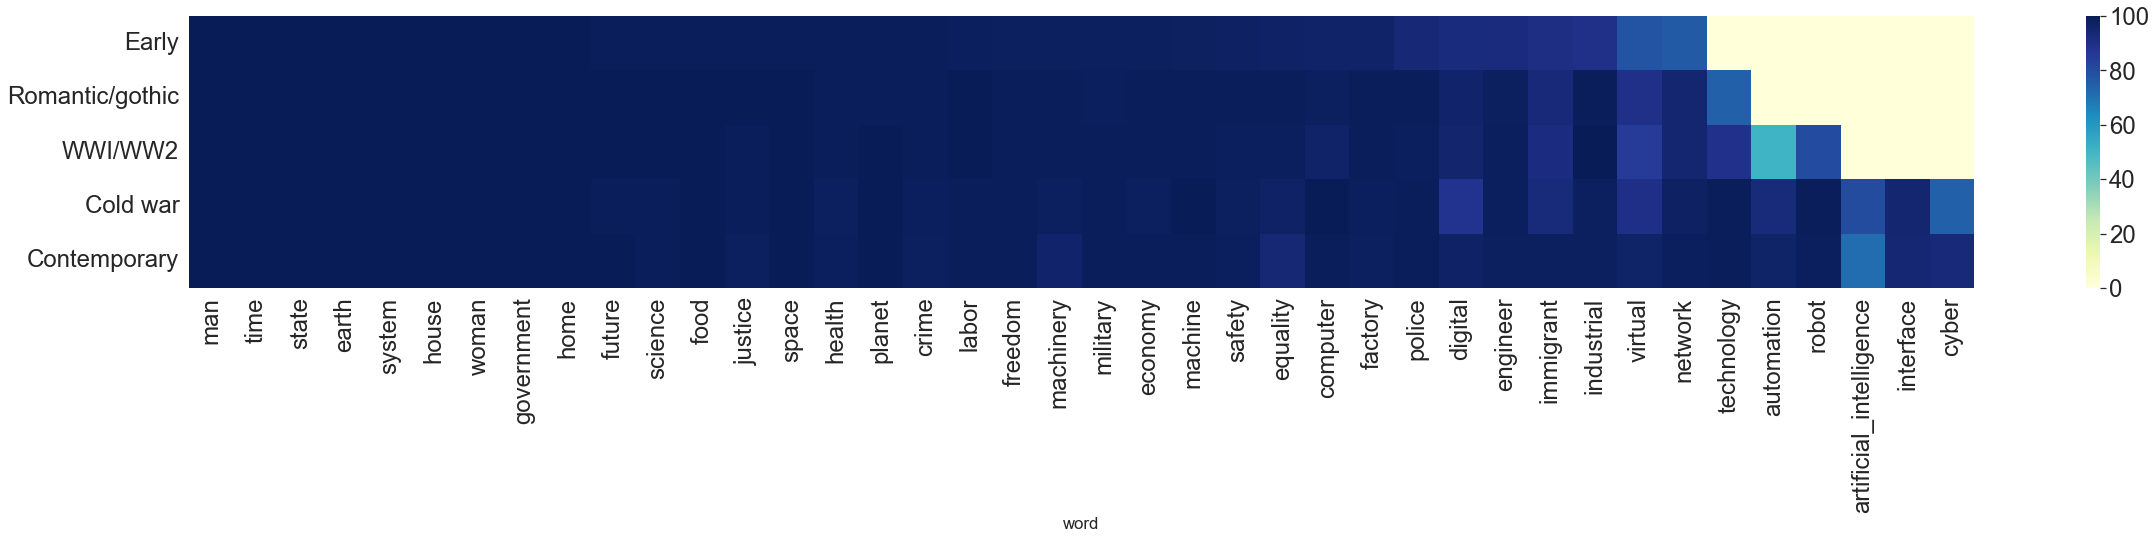

In [121]:
fig, ax = plt.subplots(figsize = (len(target_words), len(eras)))
ax = sns.heatmap(freqs_df[[era for era in eras.keys()]].transpose(copy=True), ax = ax, cmap="YlGnBu")
x = ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 24)
y = ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 24)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=24)

In [122]:
era_list = [era for era in eras.keys()]
delta_cols = []
for era0, era1 in zip(era_list[0:-1], era_list[1:]):
    freqs_df[r'$\Delta$' + era1] = (freqs_df[era1] - freqs_df[era0])/freqs_df[era0]#np.log10(np.abs(freqs_df[era1] - freqs_df[era0]))#*np.sign(freqs_df[era1] - freqs_df[era0])
    delta_cols.append(r'$\Delta$' + era1)
freqs_df.fillna(0, inplace = True)
freqs_df.replace([np.inf, -np.inf], 0,inplace=True)

In [123]:
freqs_df.head()

,Early,Romantic/gothic,WWI/WW2,Cold war,Contemporary,$\Delta$Romantic/gothic,$\Delta$WWI/WW2,$\Delta$Cold war,$\Delta$Contemporary
word,,,,,,,,,
man,100.000000,100.000000,99.999137,99.992913,99.989587,0.000000,-0.000009,-0.000062,-0.000033
time,99.997154,99.998573,99.995683,99.993799,99.992711,0.000014,-0.000029,-0.000019,-0.000011
state,99.977232,99.978589,99.973235,99.824599,99.831306,0.000014,-0.000054,-0.001487,0.000067
earth,99.938810,99.983585,99.960284,99.925587,99.886496,0.000448,-0.000233,-0.000347,-0.000391
system,99.920311,99.940048,99.925748,99.856490,99.897951,0.000198,-0.000143,-0.000693,0.000415


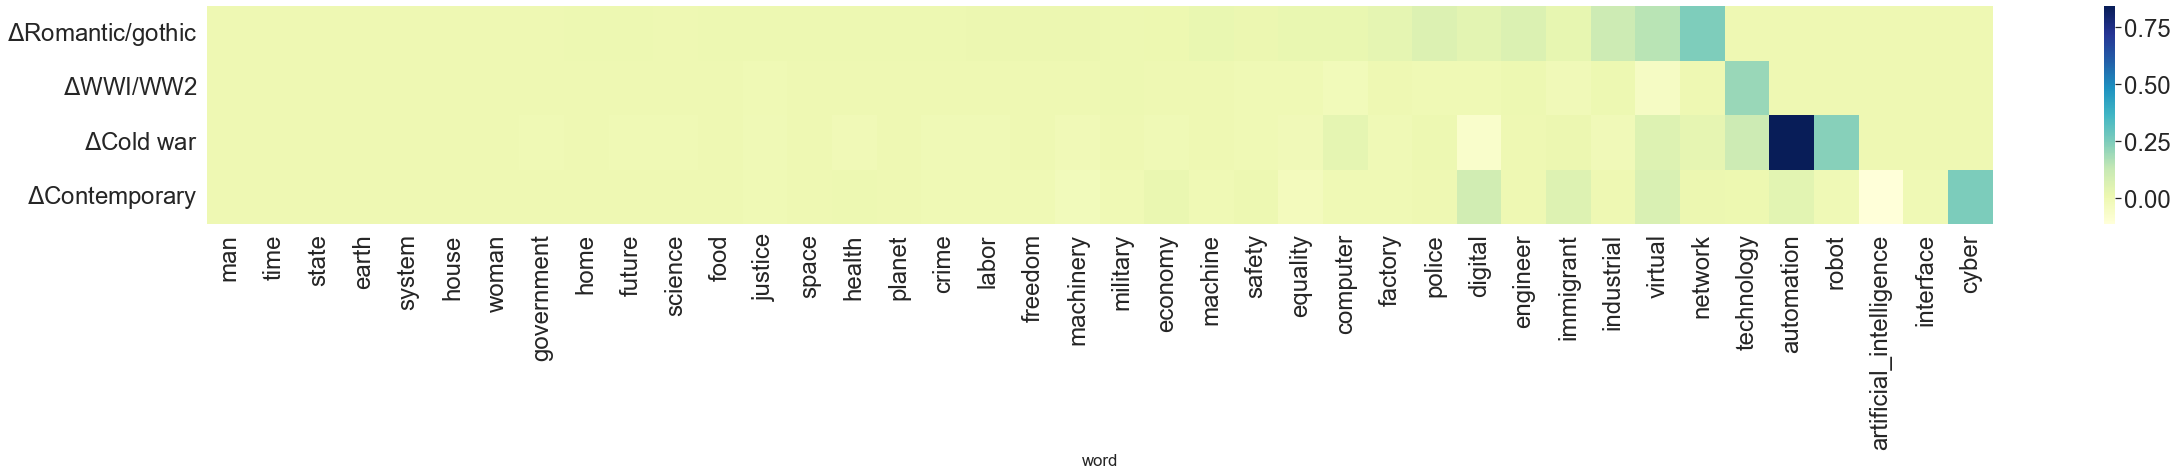

In [124]:
fig, ax = plt.subplots(figsize = (len(target_words), len(delta_cols)))
ax = sns.heatmap(freqs_df[delta_cols].transpose(copy=True), ax = ax, cmap="YlGnBu")
x = ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 24)
y = ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 24)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=24)